# Data Analysis with Python

## Data Adquisition

### Read Data

In [ ]:
import pandas as pd

path = ... # direction of file to open http or local

df = pd.read_csv(path)

# if the csv doesn't contain headers

df = pd.read_csv(peth, headers = None)

In [ ]:
# To show first rows

df.head()

# To show last rows

df.tail()

# To add Headers

headers = ["", ""]

df.columns = headers

In [ ]:
# To drop missing values

df.dropna(subset = ['''column name to change'''], axis = 0)
# axis = 0 refers to columns; axis = 1 refers to rows

### Save Dataset

In [ ]:
df.to_csv("fileName.csv", index = False)

## Basic Insight of Dataset

### Data Types

In [ ]:
df.dtypes

### Describe

In [ ]:
df.describe() # Only for Numeric types 

df.describe(include = "all") # For every type in dataset

In [ ]:
# To select columns in dataset

df[['column 1', 'column 2', 'column 3']]

### Info

In [ ]:
df.info

##  Identify and Handle missing values

### Identify missing values

#### Convert "?" to NaN

In [ ]:
df.replace("?", nan, inplace = True)

#### Evaluating for missing values

there are two methods

- .isnull()
- .notnull()

In [ ]:
missing_data = df.isnull()

#### Count missing values in each column

In [ ]:
for count in missing_data.columns.values.tolist():
    print(column)
    print(missing_data['column'].value_counts())
    print("")

#### Deal with missing data

drop data
- a. drop the whole row
- b. drop the whole column

replace data
- a. replace it by mean
- b. replace it by frequency
- c. replace it based on other functions



#### Calculate the average of a column

In [ ]:
col_mean = df["column 1"].astype("float").mean(axis = 0)

#### replace NaN by mean

In [ ]:
df['column 1'].replace(np.nan, col_mean, inplace = True)

### Correct data format

in pandas we use:

- .dtype() to check the data type
- .astype() to change the data type 


##  Data Standardization

### Simple Feature Scaling 

In [ ]:
df['column 1'] = df['column 1']/df['column 1'].max()

### Min - Max

In [ ]:
df['column 1'] = (df['column 1'] - df['column 1'].min())/(df['column 1'].max() - df['column 1'].min())

### Z-score or Standard Score

In [ ]:
df['column 1'] = (df['column 1'] - df['column 1'].mean())/df['column 1'].std()

## Binning Data in Pandas

for binnign in pandas we use the numpy linspace(start_value, end_value, numbers_generated) function

In [ ]:
import numpy as np

bins = np.linspace(min(df['column 1']), max(df['column 1']), number of bins)

bin_names = ['name bin 1', 'name bin 2', ...]

# We apply the function cut

df['column 1-binned'] = pd.cut(df['column 1'], bins, label = bin_names, include_lowest = True)
df[['column 1', 'column 1-binned']].head()
df['column 1-binned'].value_counts()

##  Indicator variable (or dummy variable)

An indicator variable (or dummy variable) is a numerical variable used to label categories.
they are called dummies because their values does not have inherent meaning.

In [ ]:
dummy_variable_1 = pd.get_dummies(df['categorical_column'])

In [ ]:
# To merge dataframe and dummy_variable_1

df = pd.concat([df, dummy_variable_1], axis = 1)

## Analyzing individual feature patterns using Visualization

In [ ]:
import matplotlib as plt
import seaborn as sns
% matplotlib inline

### Correlation

- corr > 0 : positive correlation (variables move the same way)
- corr = 0 : no correlation
- corr < 0 : negative correaltion (variables move inverse sense)

In [ ]:
df.corr()

### Continuous numerical variables

int64, float64

In order to start understanding the (linear) relationship between an individual variable and the target variable. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.

#### Positive linear relationship

As one variable goes up, the other variable goes up: this indicates a positive direct correlation between these two variables.

In [ ]:
sns.regplot(x = 'variable', y = 'target_variable', data = df)
plt.ylim(0,)

In [ ]:
# Examine the correlation

df[['variable', 'target_variable']].corr()

#### Weak linear relationship

If the regression line is close to horizontal and the data points are very scattered and far from the fitted line, shows lots of variability. Therefore the variable selected versus the target variable it's not a reliable variable.

### Categorical Variables

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

In [ ]:
sns.boxplot(x = 'variable', y = 'target_variable', data = df)

## Descriptive Statistical Analysis

The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:

- the count of that variable
- the mean
- the standard deviation (std) 
- the minimum value
- the IQR (Interquartile Range: 25%, 50% and 75%)
- the maximum value


In [ ]:
df.describe()

df.describe(include = "all")

###  Value Counts

Value-counts is a good way of understanding how many units of each characteristic/variable we have. Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes. As a result, we only include one bracket "df['variable']" not two brackets "df[['variable']]".

In [ ]:
df['variable'].value_counts()

# we can convert the series to a dataframe

df['variable'].value_counts().to_frame()

## Basics of grouping

The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.

In [ ]:
df_group = df.groupby(['variable'], as_index = False)

# group by multiple variables

df_group_2 = df.groupby(['variable_1', 'variable_2'], as_index = False)

This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.

In [ ]:
df_group_pivot = df_group_2.pivot(index = 'variable_1', columns = 'variable_2')

Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.

In [ ]:
df_group_pivot = df_group_pivot.fillna(0) # fill missing values with 0

Let's use a heat map to visualize the relationship between variables

In [ ]:
plt.pcolor(df_group_pivot, cmap = 'RdBu')

# label names

row_labels = df_group_pivot.columns.level[1]
col_labels = df_group_pivot.index

# move ticks and labels to the center

ax.set_xticks(np.arange(df_group_pivot.shape[1]) + 0.5, minor = False)
ax.set_yticks(np.arange(df_group_pivot.shape[0]) + 0.5, minor = False)

# insert labels

ax.set_xticklabels(row_labels, minor = False)
ax.set_yticklabels(col_labels, minor = False)

# rotate label if too long

plt.xticks(rotation = 90)


# fig.colorbar(im)
plt.colorbar()
plt.show()

Visualization is very important in data science, and Python visualization packages provide great freedom. 

## Correlation and Causation

Correlation: A measure of the extent of interdependence between variables.

Causation: The relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.

### Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.
The resulting coefficient is a value between -1 and 1 inclusive, where:</p>

 - 1: Total positive linear correlation.
 - 0: No linear correlation, the two variables most likely do not affect each other.
 - -1: Total negative linear correlation.
 
Pearson Correlation is the default method of the function "corr".  Like before we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.

### P-value: 

What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the


- p-value is < 0.001: we say there is strong evidence that the correlation is significant.
- the p-value is < 0.05: there is moderate evidence that the correlation is significant.
- the p-value is < 0.1: there is weak evidence that the correlation is significant.
- the p-value is > 0.1: there is no evidence that the correlation is significant.



In [ ]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['variable'], df['target_variable'])

## ANOVA: Analysis of Variance

The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

- F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

- P-value: P-value tells how statistically significant is our calculated score value.

In [ ]:
f_val, p_val = stats.f_oneway(df_group_2.get_group('category_1')['target_variable'], df_group_2.get_group('category_2')['target_variable'])

## Model Development

### Setup

In [1]:
# import important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# we load the data
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### Linear Regression and Multiple Linear Regression

**Linear Regression**

Simple Linear Regression is a method to help us understand the relationship between two variables:

- The predictor/independent variable (X)
- The response/dependent variable (that we want to predict)(Y)

The result of Linear Regression is a **linear function** that predicts the response (dependent) variable as a function of the predictor (independent) variable.

Y : Response Variable
X : Predictor Variables

Linear Function:

**Yhat = a + bX

- a refers to the intercept of a regression line0, in other words the value Y when X is 0
- b refers to the slope of the regression line, in other words: hte value with which Y changes when X increases by 1 unit

In [11]:
# We load the modules for linear regression

from sklearn.linear_model import LinearRegression

#### Create the linear regression object

In [12]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
X = df[['highway-mpg']]
Y = df['price']

In [16]:
# Fit the linear model
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Output of the prediction

Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [18]:
# Value of the intercept

lm.intercept_

38423.305858157386

In [19]:
# Value oe the slope(b)

lm.coef_

array([-821.73337832])

In [20]:
lm1 = LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
lm1.fit(df[['engine-size']], df[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Multiple Linear Regression

Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. 

Y : Response Variable 

X1 : Predictor Variable 1

X2 : Predictor Variable 2

X3 : Predictor Variable 3

Xn : Predictor Variable n

a : Intercept

b1 : coefficient of Variable 1

b2 : coefficient of Variable 2

b3 : coefficient of Variable 3

bn : coefficient of Variable n

the equation will be:

Yhat = a + b1X1 + b2X2 + b3X3 + .... + bnXn

In [22]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [23]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Intercept

lm.intercept_

-15806.624626329198

In [25]:
# coefficients

lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

### Model Evaluation using Visualization

#### Regression Plot

This plot will show a combination of a scattered data points (a scatter plot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation)

In [26]:
import seaborn as sns
%matplotlib inline

(0.0, 48173.712434597604)

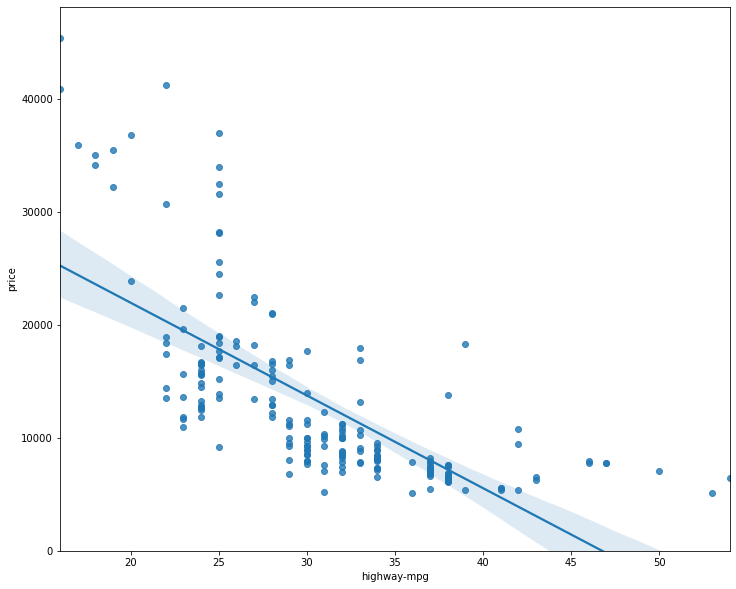

In [27]:
width = 12
height = 10
plt.figure(figsize = (width, height))
sns.regplot(x = 'highway-mpg', y = 'price', data = df)
plt.ylim(0,)

#### Residual Plot

A residual (e) is the difference between the observed value (y) and the predicted value (Yhat). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

We look at the spread of the residuals:

If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

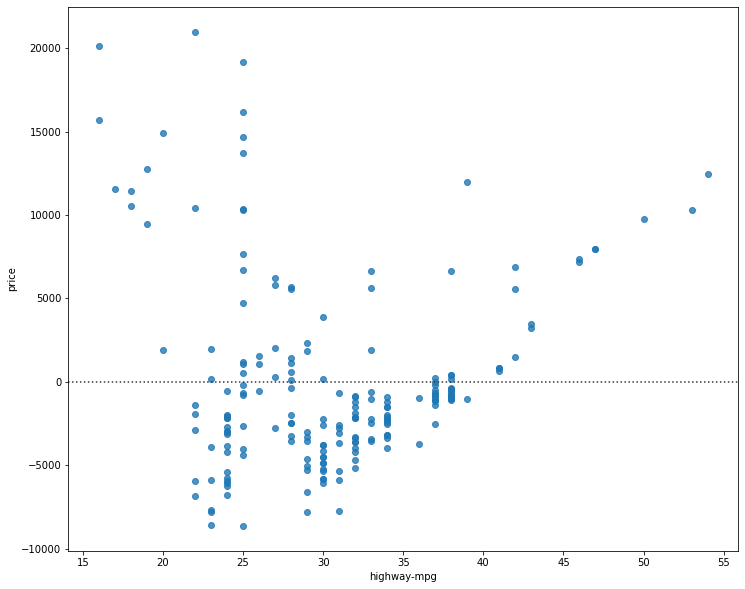

In [29]:
width = 12
height = 10
plt.figure(figsize = (width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

#### Multiple Linear Regression

One way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [30]:
Y_hat = lm.predict(Z)

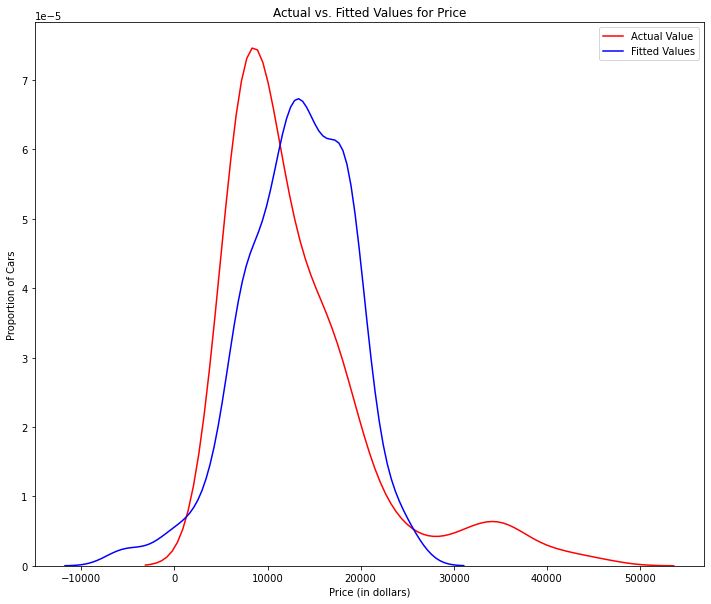

In [32]:
plt.figure(figsize = (width, height))

ax1 = sns.distplot(df['price'], hist = False, color = 'r', label = 'Actual Value')
sns.distplot(Yhat, hist = False, color = 'b', label = 'Fitted Values', ax = ax1)

plt.title('Actual vs. Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#### Polynomial Regression and Pipelines

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

There are different orders of polynomial regression:

- Quadratic - 2nd order: Y Hat = a + b1X**2 + b2X**2
- Cubic - 3rd order: Y Hat = a + b1X**2 + b2X**2 + b3X**3
- Higher order: Y = a + b1X**2 + b2X**2 + b3X**3 + .....

In [33]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('price')
    
    plt.show()
    plt.close()

In [34]:
x = df['highway-mpg']
y = df['price']

In [35]:
# Polynomial of the third order (Cubic)

f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


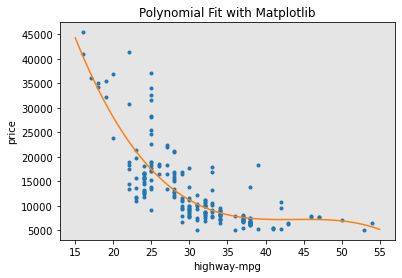

In [36]:
PlotPolly(p, x, y, 'highway-mpg')

In [37]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

#### Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [41]:
# the pipeline is created with a list of tuples

imput = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]

In [42]:
pipe = Pipeline(imput)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [43]:
pipe.fit(Z, y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [44]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

### Measures for In-Sample Evaluation

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

- R^2 / R-squared
- Mean Squared Error (MSE)

**R-squared**

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

**Mean Squared Error (MSE)**

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

#### Model 1: Simple Linear Regression

In [45]:
# calculate R^2

lm.fit(X, Y)
lm.score(X, Y)

0.4965911884339175

In [46]:
# Calculate MSE

Yhat = lm.predict(X)
Yhat[0: 4]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ])

In [48]:
from sklearn.metrics import mean_squared_error

In [50]:
mse = mean_squared_error(df['price'], Yhat)
mse

31635042.944639895

#### Model 2: Multiple Linear Regression

In [52]:
lm.fit(Z, df['price'])
lm.score(Z, df['price'])

0.8093562806577457

In [53]:
Y_predict_Multifit = lm.predict(Z)
mean_squared_error(df['price'], Y_predict_Multifit)

11980366.87072649

#### Model 3: Polynomial Fit

In [54]:
from sklearn.metrics import r2_score

In [55]:
r_squared = r2_score(y, p(x))
r_squared

0.674194666390652

In [56]:
mean_squared_error(df['price'], p(x))

20474146.426361218

### Prediction and Decision Making

#### Prediction

In [57]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [58]:
new_input = np.arange(1, 100, 1).reshape(-1, 1)

In [59]:
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
yhat = lm.predict(new_input)
yhat[0: 5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

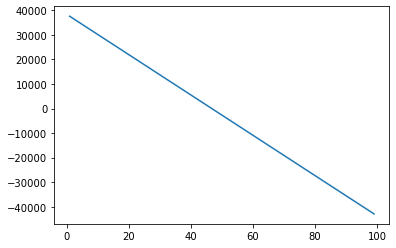

In [61]:
plt.plot(new_input, yhat)
plt.show()

## Model Evaluation and Refinement

In [10]:
import pandas as pd
import numpy as np

path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'

df = pd.read_csv(path)

In [11]:
df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [6]:
from IPython.display import display
from IPython.html import widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

### Funstions for plotting

In [37]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.distplot(RedFunction, hist = False, color = 'r', label = RedName)
    ax2 = sns.distplot(BlueFunction, hist = False, color = 'b', label = BlueName, ax = ax1)
    
    plt.title(Title)
    plt.xlabel('Price')
    plt.ylabel('Proportion of cars')
    
    plt.show()
    plt.close()

In [47]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize = (width, height))
    
    # traininig data
    # testing data
    # lr : linear regression object
    # poly_transform: polynomial transformation object
    
    xmax = max([xtrain.values.max(), xtest.values.max()])
    
    xmin = min([xtrain.values.min(), xtest.values.min()])
    
    x = np.arange(xmin, xmax, 0.1)
    
    plt.plot(xtrain, y_train, 'ro', label = 'Training Data')
    plt.plot(xtest, y_test, 'go', label = 'Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label = 'Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

### Training and Testing

In [12]:
y_data = df['price']

In [13]:
x_data = df.drop('price', axis = 1)

In [14]:
# Randomly split the data into training and testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.15, random_state = 1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:", x_train.shape[0])

number of test samples : 31
number of training samples: 170


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lre = LinearRegression()

In [17]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# Calculate R^2 on test data

lre.score(x_test[['horsepower']], y_test)

0.707688374146705

In [19]:
# Calculate R^2 on train data

lre.score(x_train[['horsepower']], y_train)

0.6449517437659684

### Cross-validation Score

In [20]:
from sklearn.model_selection import cross_val_score

In [22]:
Rcross = cross_val_score(lre,x_data[['horsepower']], y_data, cv = 4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [23]:
Rcross.mean(), Rcross.std()

(0.522009915042119, 0.2911839444756029)

In [24]:
# We can use negative squared error as a score by setting the parameter 'scoring' metric to 
# 'neg_mean_squared_error'

-1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv = 4, scoring = 'neg_mean_squared_error')

array([20254142.84026704, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [26]:
# We can calculate the average R^2 

Rc = cross_val_score(lre, x_data[['horsepower']], y_data, cv = 2)
Rc.mean()

0.5166761697127429

We use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, using one fold to get a prediction while the rest of the folds are used as test data.

In [28]:
from sklearn.model_selection import cross_val_predict

In [29]:
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv = 4)
yhat[0: 5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

### Overfitting, Underfitting and Model Selection

It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well your model performs in the real world.  One reason for this is overfitting. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.

In [31]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# Prediction using training data:

yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0: 5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

In [33]:
# Prediction using Test Data:

yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0: 5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

Let's perform some model evaluation separately

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

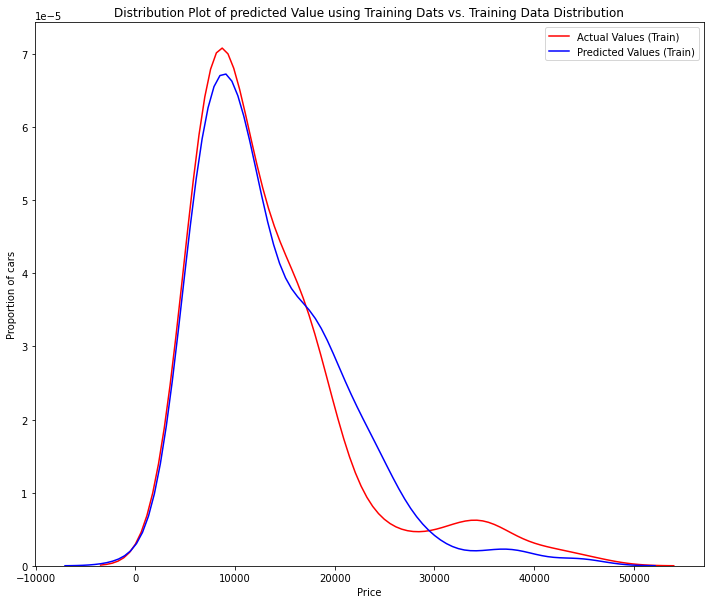

In [38]:
Title = 'Distribution Plot of predicted Value using Training Dats vs. Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the training data. 

So far the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values. 

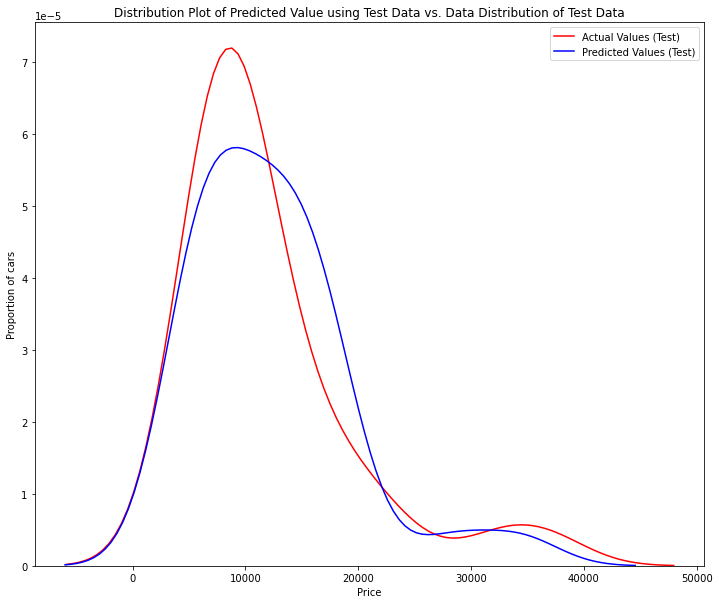

In [39]:
Title = 'Distribution Plot of Predicted Value using Test Data vs. Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

Fig. 2: Plot of predicted value using the test data compared to the test data. 

Comparing Figure 1 and Figure 2; it is evident the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent where the ranges are from 5000 to 15 000. This is where the distribution shape is exceptionally different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

In [40]:
from sklearn.preprocessing import PolynomialFeatures

#### Overfitting

Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing your model using the test-set, your model does not perform as well as it is modelling noise, not the underlying process that generated the relationship.

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.45, random_state = 0)

In [42]:
# We create a 5 degree polynimial transformation

pr = PolynomialFeatures(degree = 5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [43]:
# We create a linear Regression Model

poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
yhat = poly.predict(x_test_pr)
yhat[0: 5]

array([ 6728.70501896,  7308.02845162, 12213.7843307 , 18893.19108677,
       19995.88963424])

In [45]:
# We take the first 4 predicted values to compare to the actual targets

print("Predicted Values:", yhat[0: 4])
print("True Values:", y_test[0: 4].values)

Predicted Values: [ 6728.70501896  7308.02845162 12213.7843307  18893.19108677]
True Values: [ 6295. 10698. 13860. 13499.]


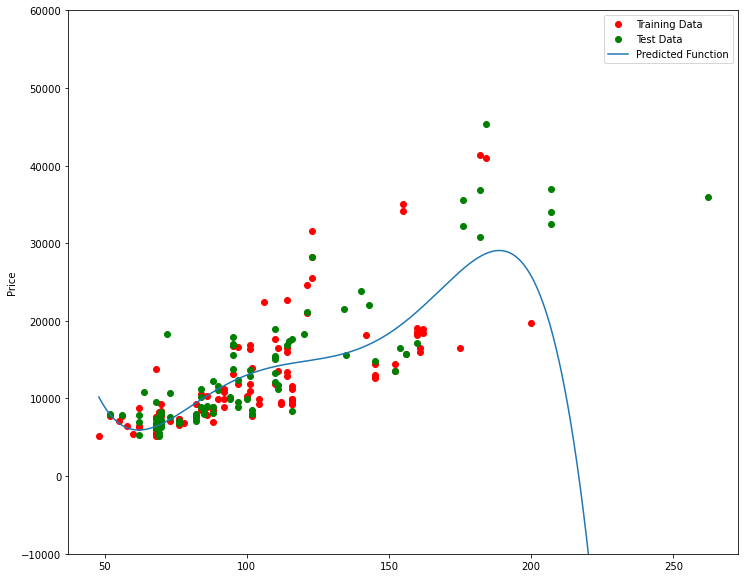

In [48]:
# We use the PolyPlot function to display the data

PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

Fig. 3 A polynomial regression model, red dots represent training data, green dots represent test data, and the blue line represents the model prediction. 

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points. 

In [49]:
# R^2 of the training data

poly.score(x_train_pr, y_train)

0.5567716902635091

In [50]:
# R^2 of the Test Data

poly.score(x_test_pr, y_test)

-29.87141885918752

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.

Text(3, 0.75, 'Maximum R^2')

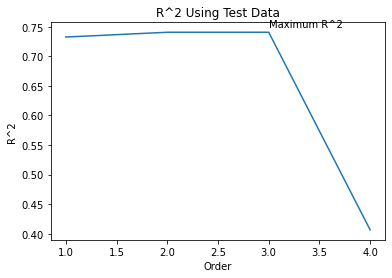

In [51]:
Rsqu_test = []

order = [1, 2, 3, 4]

for n in order:
    
    pr = PolynomialFeatures(degree = n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))
    
plt.plot(order, Rsqu_test)
plt.xlabel('Order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2')

We see the R^2 gradually increases until an order three polynomial is used. Then the  R^2 dramatically decreases at four.

In [52]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = test_data, random_state = 0)
    pr = PolynomialFeatures(degree = order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

In [53]:
interact(f, order = (0, 6, 1), test_data = (0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

### Ridge regression



In [59]:
pr = PolynomialFeatures(degree = 2)

x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])

In [55]:
from sklearn.linear_model import Ridge

In [56]:
# We create a Ridge Regression with a parameter of 0.1

RigeModel = Ridge(alpha = 0.1)

In [60]:
RigeModel.fit(x_train_pr, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [61]:
# We obtain the prediction

yhat = RigeModel.predict(x_test_pr)

In [62]:
print('predicted:', yhat[0: 4])
print('test set:', y_test[0: 4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set: [ 6295. 10698. 13860. 13499.]


In [63]:
# We select the value of alpha that minimizes the test error

Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0, 1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha = alfa)
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

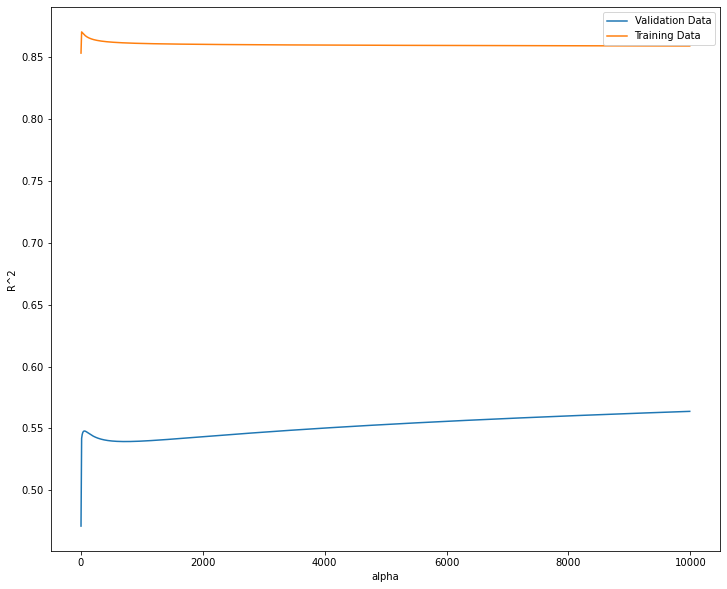

In [64]:
# We plot the value of R^2 for different alphas

width = 12
height = 10
plt.figure(figsize = (width, height))

plt.plot(ALFA, Rsqu_test, label = 'Validation Data')
plt.plot(ALFA, Rsqu_train, label = 'Training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Fig. 4:The blue line represents the R^2 of the test data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alfa 

The red line in fig. 6 represents the  R^2 of the test data, as Alpha increases the R^2 decreases; therefore as Alfa increases the model performs worse on the test data.  The blue line represents the R^2 on the validation data, as the value for Alfa increases the R^2 decreases.   

### Grid Search

The term Alfa is a hyperparameter, sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

In [65]:
from sklearn.model_selection import GridSearchCV

In [67]:
# We create a dictionary of parameter values

parameters1 = [{'alpha': [0.001, 0.1, 1, 10, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 1000, 10000, 100000, 100000]}]

In [69]:
# We create a Ridge regions object

RR = Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [70]:
# We create a search object

Grid1 = GridSearchCV(RR, parameters1, cv = 4)

In [71]:
# Fit the model

Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 1000, 10000, 100000,
                                    100000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR:

In [72]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [73]:
# We test the model on the test data

BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036149